In [23]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import pandas as pd
import matplotlib.dates as mpl_dates
import scipy.stats as stats
from matplotlib.ticker import StrMethodFormatter 

### Functions

In [24]:
def plotCSNS(axv,lonsec,zsec,transpsec,lonW,lonE,latgridi,depi,vmax,time,title,cblabel,ylabel):
    
    latgridf = latgridi-1 #actually lon
    fmask = mesh.fmask[0,:,:,latgridf] # Giving mask of longitudes
    tmask = mesh.tmask[0]
    
    lons = data.init_lat[(data.final_section != 0)]
    
    f_lons = mesh.gphif[0,:, latgridf]
    u_lons = mesh.gphiv[0,:, latgridf]
    w_depths = mesh.gdepw_1d

    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    cmap = cm.deep
    
    arr,xe,ye,im = axv.hist2d(lonsec/m2lon,df(zsec)[0],weights=transpsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE:1]/m2lon),w_depths[0,0:depi]],
                              density=True,vmax=vmax
                                )
    
    X,Y = np.meshgrid(xe,ye)
    
    im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time),cmap=cmap,vmax=vmax)
    
    axv.invert_yaxis()
    axv.set_title(title)
    axv.set_xlabel('Latitude (°W)')
    axv.set_xticks(np.linspace(f_lons[lonW+2]/m2lon,f_lons[lonE-2]/m2lon,2))
    axv.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
    axv.set_xticklabels(['{:.2f}'.format(label) for label in np.linspace(f_lons[lonW+2],f_lons[lonE-2],2)])
    axv.set_xticklabels(np.round(np.linspace(f_lons[lonW+2],f_lons[lonE-2],2),2))
    
    pc = draw_patches(fmask, lonW, lonE, np.array(u_lons), np.array(w_depths[0]),m2lon)
    axv.add_collection(pc)

    if cblabel == True:
        cb = fig.colorbar(im,ax=axv)
        cb.set_label('Transport (m/s)')
    
    if ylabel == True:
        axv.set_ylabel('Depth (m)')
        
    else: 
        axv.set_yticklabels([])

## Import data

In [25]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

df = interp.interp1d(mesh.z,mesh.gdepw_1d) # Interpolate to get same binning scheme as SalishSeaCast

In [26]:
starttime = 1
endtime = 24
sectionnum = [0,1,2,3,4,5,6,7,8]

date = dt.datetime(2016,12,10)
enddate = dt.datetime(2021,12,27)

dates = []
datelist_vs = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_vs.append(date)
    date+=dt.timedelta(days=1)

### Import transport data

In [27]:
#Import  data
#Dec 13th 2017 - Dec 27th 2021
harotosouth_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/harotosouth18-21.csv')
datelist_harotosouth = pd.to_datetime(harotosouth_df['Date'])
harotosouth = pd.DataFrame({'Transport':harotosouth_df['Transport'].values},index=datelist_harotosouth)['Transport']
harotosouth

#Import PRtovs data
#Dec 13th 2017 - Dec 27th 2021
PRtovs_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs_haro_avg.csv')
datelist_PRtovs_haro = pd.to_datetime(PRtovs_haro_avg_df['Date'])
PRtovs_haro_avg = pd.DataFrame({'Transport':PRtovs_haro_avg_df['Transport'].values},index=datelist_PRtovs_haro)['Transport']
PRtovs_haro_avg_df

#Import Gulftovs data
#Dec 13th 2017 - Dec 27th 2021
Gulftovs_haro_avg_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/Gulftovs_haro_avg.csv')
datelist_Gulftovs_haro = pd.to_datetime(Gulftovs_haro_avg_df['Date'])
Gulftovs_haro_avg = pd.DataFrame({'Transport':Gulftovs_haro_avg_df['Transport'].values},index=datelist_Gulftovs_haro)['Transport']
Gulftovs_haro_avg

rostosouth_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth18-21.csv')
datelist_rostosouth = pd.to_datetime(rostosouth_df['Date'])
rostosouth = pd.DataFrame({'Transport':rostosouth_df['Transport'].values},index=datelist_rostosouth)['Transport']
rostosouth

#Only 2018
#Dec 16th 2017 - Dec 29th 2018
rostosouth_2018_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth_2018.csv')
datelist_rostosouth_2018 = pd.to_datetime(rostosouth_2018_df['Date'])
rostosouth_2018 = pd.DataFrame({'Transport':rostosouth_2018_df['Transport'].values},index=datelist_rostosouth_2018)['Transport']
rostosouth_2018

#Only 2019
#Jan 10th 2019 - Dec 29th 2019
rostosouth_2019_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth_2019.csv')
datelist_rostosouth_2019 = pd.to_datetime(rostosouth_2019_df['Date'])
rostosouth_2019 = pd.DataFrame({'Transport':rostosouth_2019_df['Transport'].values},index=datelist_rostosouth_2019)['Transport']
rostosouth_2019

#Only 2020
#Jan 5th 2020 - Dec 13th 2020
rostosouth_2020_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth_2020.csv')
datelist_rostosouth_2020 = pd.to_datetime(rostosouth_2020_df['Date'])
rostosouth_2020 = pd.DataFrame({'Transport':rostosouth_2020_df['Transport'].values},index=datelist_rostosouth_2020)['Transport']
rostosouth_2020

#Only 2021
#Dec18th 2020 - Dec 27th 2021
rostosouth_2021_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/rostosouth_2021.csv')
datelist_rostosouth_2021 = pd.to_datetime(rostosouth_2021_df['Date'])
rostosouth_2021 = pd.DataFrame({'Transport':rostosouth_2021_df['Transport'].values},index=datelist_rostosouth_2021)['Transport']

#Import sjc2south data - only PRtoVS

#Only 2018
sjctosouth_2018_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2018_sjc_avg.csv')
datelist_sjctosouth_2018 = pd.to_datetime(sjctosouth_2018_df['Date'])
sjctosouth_2018 = pd.DataFrame({'Transport':sjctosouth_2018_df['Transport'].values},index=datelist_sjctosouth_2018)['Transport']
sjctosouth_2018

#Only 2019
sjctosouth_2019_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2019_sjc_avg.csv')
datelist_sjctosouth_2019 = pd.to_datetime(sjctosouth_2019_df['Date'])
sjctosouth_2019 = pd.DataFrame({'Transport':sjctosouth_2019_df['Transport'].values},index=datelist_sjctosouth_2019)['Transport']
sjctosouth_2019

#Only 2020
sjctosouth_2020_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2020_sjc_avg.csv')
datelist_sjctosouth_2020 = pd.to_datetime(sjctosouth_2020_df['Date'])
sjctosouth_2020 = pd.DataFrame({'Transport':sjctosouth_2020_df['Transport'].values},index=datelist_sjctosouth_2020)['Transport']
sjctosouth_2020

#Only 2021
sjctosouth_2021_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtovs2021_sjc_avg.csv')
datelist_sjctosouth_2021 = pd.to_datetime(sjctosouth_2021_df['Date'])
sjctosouth_2021 = pd.DataFrame({'Transport':sjctosouth_2021_df['Transport'].values},index=datelist_sjctosouth_2021)['Transport']
sjctosouth_2021

#2018-21
sjctosouth_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/combined2timeseries/PRtoVS_sjc_avg.csv')
datelist_sjctosouth = pd.to_datetime(sjctosouth_df['Date'])
sjctosouth = pd.DataFrame({'Transport':sjctosouth_df['Transport'].values},index=datelist_sjctosouth)['Transport']
sjctosouth

Date
2017-12-16    608.113976
2017-12-17    643.219048
2017-12-18    689.088780
2017-12-19    623.746552
2017-12-20    791.231496
                 ...    
2021-12-23    752.208204
2021-12-24    801.520026
2021-12-25    854.447160
2021-12-26    871.266741
2021-12-27    818.837967
Name: Transport, Length: 1472, dtype: float64

### Import density data

In [28]:
# Importing density and tidal data

# density_ros = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_2017-22_rosarioNS.csv')
# dens_diff_ros = np.array(density_ros.south - density_ros.north)

density_ros = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_rospr.csv')
dens_diff_ros = np.array(density_ros.south - density_ros.north)

# density_rosVS = pd.read_csv('sigma_2018_rosariopr_202111_meanv2.csv')
# dens_diff_rosVS = np.array(density_rosVS.south - density_rosVS.north)

# density_haro = pd.read_csv('sigma_2018_harovs_202111_mean_v2.csv')
# dens_diff_haro = np.array(density_haro.south - density_haro.north)

density_vspr = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_vspr_v4.csv')
dens_diff_vspr = np.array(density_vspr.south - density_vspr.north)

tides = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/low_pass_tide_2018-22_BP.csv')
# tides = pd.read_csv('low_pass_tide_18-22.csv').iloc[:730,:]


date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_tides = []

while date <= enddate:
    datelist_tides.append(date)
    date+=dt.timedelta(days=1)

#Confirm dates are same length

print(len(datelist_tides))
print(tides.iloc[:,1].shape)   
 
date = dt.datetime(2016,1,1)
enddate = dt.datetime(2022,12,31)
datelist_dens = []

while date <= enddate:
    datelist_dens.append(date)
    date+=dt.timedelta(days=1)
    
dens_diff_ros
print(len(datelist_dens))
print(dens_diff_ros.size)

2191
(2191,)
2557
2557


In [29]:
tides['vozocrtx']

0            NaN
1            NaN
2       0.607365
3       0.508302
4       0.436066
          ...   
2186    0.908305
2187    0.787567
2188    0.629463
2189    0.472127
2190         NaN
Name: vozocrtx, Length: 2191, dtype: float64

In [30]:
wind = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/day_avg_wind_17-22.csv')
x = wind['time']
y = wind['wind']

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_winds = []

while date <= enddate:
    datelist_winds.append(date)
    date+=dt.timedelta(days=1)
    
y_mean4 = y.rolling(window=4, center=True).mean()

### Fraser river discharge

In [31]:
# Import data and take mean

FR_data = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/FR_discharge.csv')
FR_4mean = FR_data['Discharge (m3/s)'].rolling(window=4,center=True).mean()

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)

dates = []
datelist_FR = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_FR.append(date)
    date += dt.timedelta(days=1)

### Import puget river data

In [32]:
#Import puget river data
pugetr_df = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/puget_rivers_avg.csv')
datelist_pugetr = pd.to_datetime(pugetr_df['Date'])
pugetr = pd.DataFrame({'discharge(kg/m2/s)':pugetr_df['0'].values},index=datelist_pugetr)['discharge(kg/m2/s)'].rolling(window=4,center=True).mean().dropna()
datelist_pugetr = pd.to_datetime(pugetr.index)

In [33]:
mask = np.isin(datelist_pugetr,datelist_rostosouth)
pugetr_ros = pugetr[mask]
pugetr_ros_m3s = pugetr_ros/1026*500*440

-0.6476043989005605


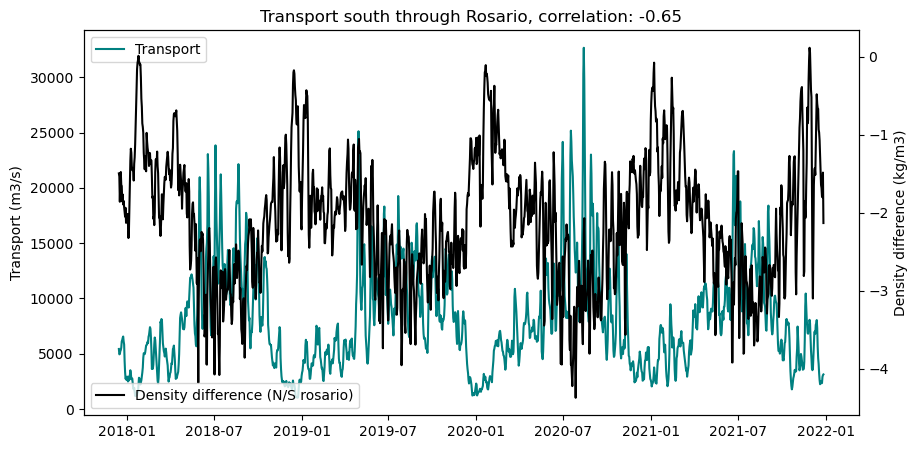

In [34]:
date_rossh = list(rostosouth.dropna().index)

mask = np.isin(datelist_dens,date_rossh)
densdiff_ros = dens_diff_ros[mask]
date_dens_sh = np.array(datelist_dens)[mask]

corr_rostosouth,p = stats.spearmanr(densdiff_ros,rostosouth.dropna())
print(corr_rostosouth)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(rostosouth.dropna(),color='teal',label='Transport')
ax2=ax.twinx()
ax2.plot(date_dens_sh,densdiff_ros,color='k',label='Density difference (N/S rosario)')
ax.set_title(f'Transport south through Rosario, correlation: {np.round(corr_rostosouth,2)}')
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Density difference (kg/m3)')
ax.legend(loc=2)
ax2.legend()

-3350.145271843174 1075.0503452139744


Text(0.5, 1.0, 'South through rosario, correlation = -0.138')

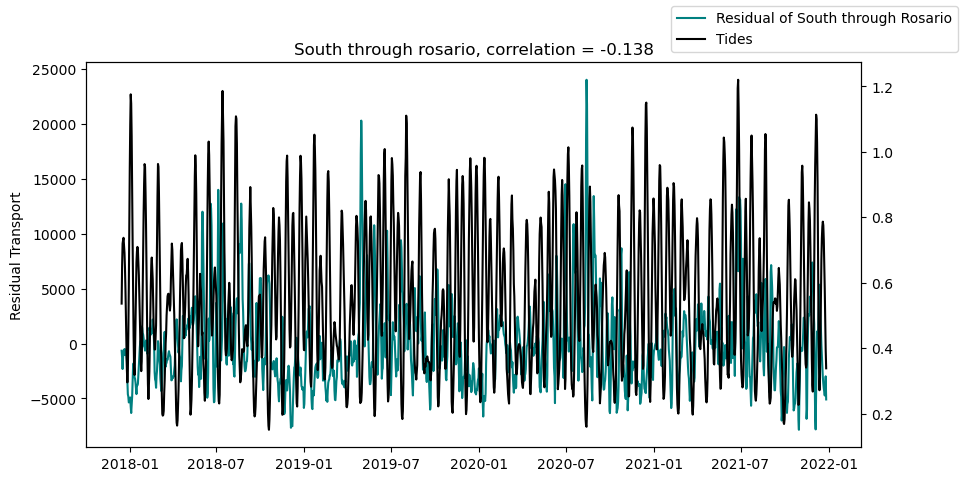

In [35]:
slope,intercept = np.polyfit(densdiff_ros,rostosouth.dropna(),1)
ddline = slope*densdiff_ros+intercept
res = rostosouth.dropna() - ddline
print(slope,intercept)

mask = np.isin(datelist_tides,date_rossh)
date_tides_sh = np.array(datelist_tides)[mask]
tides_sh = tides.vozocrtx[mask]

corr_res_ros,p = stats.spearmanr(tides_sh,res)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res,color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_tides_sh,tides_sh,color='k',label='Tides')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'South through rosario, correlation = {np.round(corr_res_ros,3)}')

Text(0.5, 1.0, 'corr = -0.201')

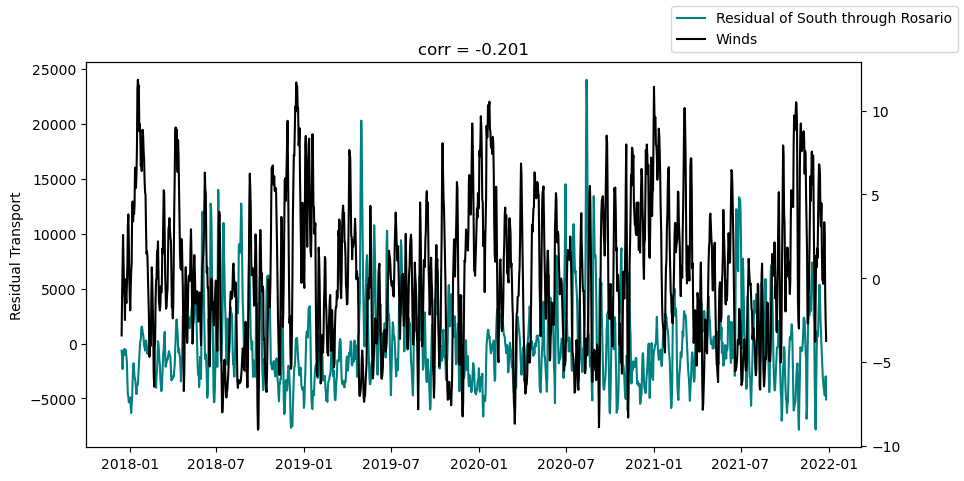

In [36]:
mask = np.isin(datelist_winds,date_rossh)
date_winds_sh = np.array(datelist_winds)[mask]
winds_sh = y_mean4[mask]

corr_res_ros_wind,p = stats.spearmanr(winds_sh,res)
corr_res_ros_wind

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res,color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_winds_sh,winds_sh,color='k',label='Winds')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr_res_ros_wind,3)}')

/tmp/ipykernel_2783694/352964904.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(0,70,10),color='k');


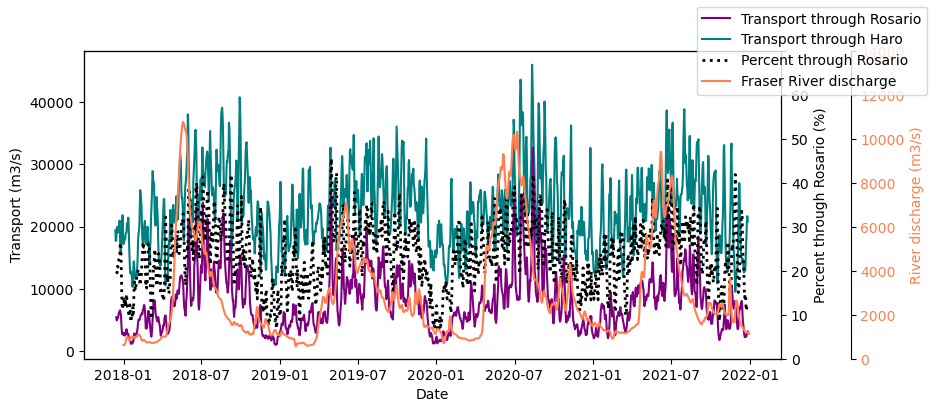

In [37]:
date_harosh = list(harotosouth.dropna().index)
prop_ros = rostosouth.dropna() /(harotosouth.dropna()+rostosouth.dropna()+sjctosouth.dropna())
prop_sjc = sjctosouth.dropna() /(harotosouth.dropna()+rostosouth.dropna()+sjctosouth.dropna())
prop_haro = harotosouth.dropna() /(harotosouth.dropna()+rostosouth.dropna()+sjctosouth.dropna())

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(rostosouth.dropna(),label='Transport through Rosario',color='purple',zorder=5)
ax.plot(harotosouth.dropna(),label='Transport through Haro',color='teal')
# ax.plot(sjctosouth.dropna(),label='Through SJC',color='purple')
# ax.legend(loc=2)
# ax.set_title(f'Transport south through Straits')
ax.set_ylabel('Transport (m3/s)')
ax.set_xlabel('Date')

ax2 = ax.twinx()
ax2.plot(date_harosh,prop_ros*100,color='k',ls=':',lw=2,label='Percent through Rosario')
# ax2.plot(date_harosh,prop_sjc*100,color='green',ls=':',lw=2,label='Percent through Rosario')
ax2.set_ylim([0,70])
ax2.set_ylabel('Percent through Rosario (%)',color='k')
# ax2.legend(loc=1)
ax2.set_yticklabels(np.arange(0,70,10),color='k');

ax3 = ax.twinx()
ax3.plot(datelist_FR[365:-365],FR_4mean[365:-365],color='coral',label='Fraser River discharge')
ax3.spines['right'].set_position(('outward', 50))
ax3.set_ylabel('River discharge (m3/s)',color='coral')
ax3.set_yticks(np.arange(0,15000,2000),color='coral')
ax3.set_yticklabels(np.arange(0,15000,2000),color='coral')
# ax3.legend()

fig.legend()

In [38]:
#Import upwelling data
upwelling = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/upwelling_index.csv').iloc[1:,:]
upwelling['time'] = pd.to_datetime(upwelling['time'])
df_avg = upwelling.groupby(pd.Grouper(key='time', freq='D')).mean().reset_index()
df_avg['4mean'] = df_avg.upwelling_index.rolling(window=4, center=True).mean()

upwl_date = df_avg.time.iloc[557:-916]
upwl_idx = df_avg['4mean'].iloc[557:-916]

/tmp/ipykernel_2783694/3834887817.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = upwelling.groupby(pd.Grouper(key='time', freq='D')).mean().reset_index()


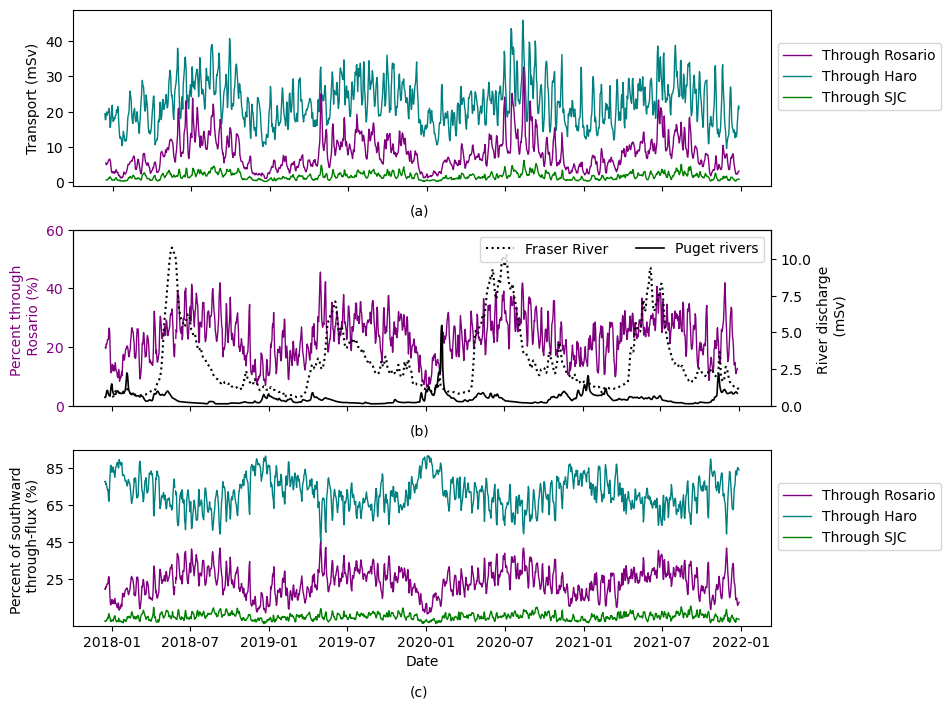

In [39]:
fig,[ax,ax1,ax5] = plt.subplots(3,1,figsize=(9,8))


ax.plot(rostosouth.dropna()/1000,label='Through Rosario',color='purple',zorder=5,lw=1)
ax.plot(harotosouth.dropna()/1000,label='Through Haro',color='teal',lw=1)
ax.plot(sjctosouth.dropna()/1000,label='Through SJC',color='green',zorder=10,lw=1)

ax.set_ylabel(f'Transport (mSv)')
ax.set_xticklabels([])
ax.set_ylim([-1,49])
ax.set_yticks(np.arange(0,41,10))
ax.legend(loc=1)
ax.legend(bbox_to_anchor=(1.0, 0.85))

ax1.plot(prop_ros*100,color='purple',label='through Rosario',lw=1)
ax1.set_yticks(np.arange(0,65,20),color='purple')
ax1.set_yticklabels(np.arange(0,65,20),color='purple')
ax1.set_ylabel('Percent through \n Rosario (%)',color='purple')
ax1.set_xticklabels([])
ax14 = ax1.twinx()
ax14.plot(datelist_FR[365:-365],FR_4mean[365:-365]/1000,color='k',label='Fraser River',ls=':')
ax14.set_yticks(np.arange(0,12000/1000,2.5))
ax14.set_ylim([0,12000/1000])
ax14.set_ylabel('River discharge \n (mSv)')
ax14.plot(pugetr_ros_m3s/1000,color='k',label='Puget rivers',lw=1.2)
ax14.legend(loc=1,ncol=2)

ax5.plot(date_harosh,prop_ros*100,color='purple',ls='-',lw=1,label='Through Rosario')
ax5.plot(date_harosh,prop_haro*100,color='teal',ls='-',lw=1,label='Through Haro')
ax5.set_ylabel('Percent of southward \n through-flux (%)',color='k')
ax5.set_ylim([0,95])
ax5.set_yticks(np.arange(25,95,20),color='k')
ax5.set_yticklabels(np.arange(25,95,20),color='k')
ax5.set_xlabel('Date')
ax5.plot(date_harosh,prop_sjc*100,color='green',ls='-',lw=1,label='Through SJC')
ax5.legend(bbox_to_anchor=(1.0, 0.85))

ax.text(0.483, -0.17, "(a)", transform=ax.transAxes)
ax1.text(0.483, -0.17, "(b)", transform=ax1.transAxes)
ax5.text(0.483, -0.40, "(c)", transform=ax5.transAxes)
fig.subplots_adjust(hspace=0.25)

In [40]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/southflow_allstraits.jpg',bbox_inches='tight')

### For CMOS

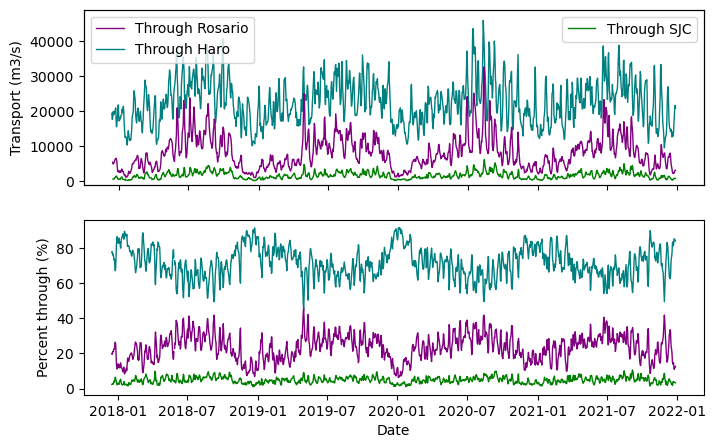

In [41]:
fig,[ax,ax5] = plt.subplots(2,1,figsize=(8,5))

ax.plot(rostosouth.dropna(),label='Through Rosario',color='purple',zorder=5,lw=1)
ax.plot(harotosouth.dropna(),label='Through Haro',color='teal',lw=1)
# ax.legend(loc=2)
# ax.set_title(f'Transport south through Straits')
ax.set_ylabel('Transport (m3/s)')
ax.set_xticklabels([])
ax.set_ylim([-1000,49000])
ax.set_yticks(np.arange(0,41000,10000))

ax2 = ax.twinx()
ax2.plot(sjctosouth.dropna(),label='Through SJC',color='green',zorder=10,lw=1)
# ax2.set_ylim([0,11000])
# ax2.set_yticks(np.arange(0,11000,2000),color='green')
# ax2.set_yticklabels(np.arange(0,11000,2000),color='green')
# ax2.set_ylabel('Transport through \n SJC (m3/s)',color='green')
ax2.set_ylim([-1000,49000])
ax2.set_yticks([])
ax.legend(loc=2)
ax2.legend(loc=1)

ax5.plot(date_harosh,prop_haro*100,color='teal',ls='-',lw=1,label='Percent through Haro')
ax5.set_ylabel('Percent through (%)',color='k')
# ax5.set_ylim([25,95])
# ax5.set_yticks(np.arange(25,95,20),color='teal')
# ax5.set_yticklabels(np.arange(25,95,20),color='teal')
ax5.set_xlabel('Date')
# ax52 = ax5.twinx()
ax5.plot(date_harosh,prop_ros*100,color='purple',ls='-',lw=1,label='Percent through Rosario')
ax5.plot(date_harosh,prop_sjc*100,color='green',ls='-',lw=1,label='Percent through Rosario')
# ax52.set_ylim([0,70])
# ax52.set_ylabel('Percent through \n Rosario + SJC (%)',color='purple')
# ax52.set_yticks(np.arange(0,70,20),color='purple')
# ax52.set_yticklabels(np.arange(0,70,20),color='purple');


In [42]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/southflow_allstraits_cmos.png',bbox_inches='tight')

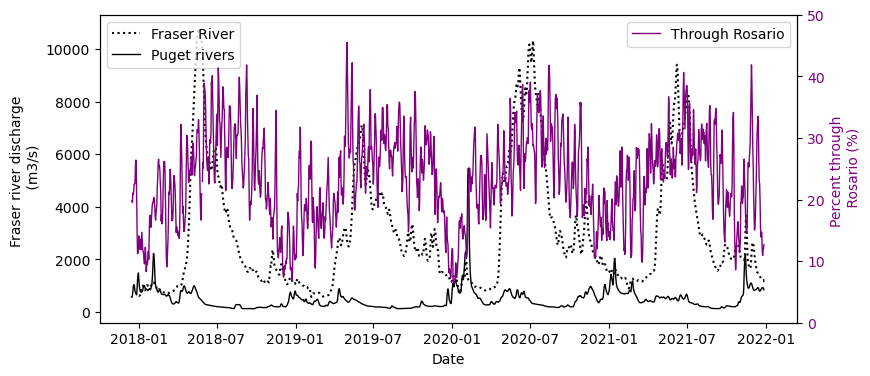

In [59]:
fig,ax14 = plt.subplots(1,1,figsize=(9,4))

ax14.plot(datelist_FR[365:-365],FR_4mean[365:-365],color='k',label='Fraser River',ls=':')
ax14.set_ylabel('Fraser river discharge \n (m3/s)')
ax14.set_xlabel('Date')

# ax12 = ax14.twinx()
ax14.plot(pugetr_ros_m3s,color='k',label='Puget rivers',lw=1)
# ax12.set_ylim([0,27])
# ax12.set_yticks(np.arange(0,25,10),color='k')
# ax12.set_yticklabels(np.arange(0,25,10),color='k')
# ax12.set_ylabel('Puget rivers discharge \n (kg/m2/s)',color='k')
# ax12.legend(loc=0)
ax14.legend(loc=2)

ax1 = ax14.twinx()
ax1.plot(prop_ros*100,color='purple',label='Through Rosario',lw=1)
# ax1.spines['right'].set_position(('outward',70))
ax1.set_yticks(np.arange(0,51,10),color='purple')
ax1.set_yticklabels(np.arange(0,51,10),color='purple')
ax1.set_ylabel('Percent through \n Rosario (%)',color='purple')
ax1.legend()



In [44]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/rivers_wsouthprop.png',bbox_inches='tight')

Proportion increases more through rosario than SJC. Both of these increase so proportion of flow through Haro decreases.

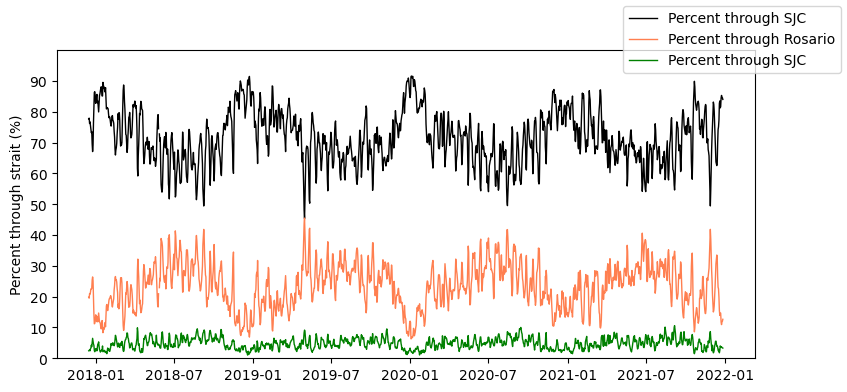

In [45]:
fig,ax2 = plt.subplots(figsize=(9,4))

ax2.plot(date_harosh,prop_haro*100,color='k',lw=1,label='Percent through SJC')
ax2.plot(date_harosh,prop_ros*100,color='coral',lw=1,label='Percent through Rosario')
ax2.plot(date_harosh,prop_sjc*100,color='green',lw=1,label='Percent through SJC')
ax2.set_ylim([0,100])
ax2.set_ylabel('Percent through strait (%)')
ax2.set_yticks(np.arange(0,100,10));
ax2.set_yticklabels(np.arange(0,100,10));
fig.legend()

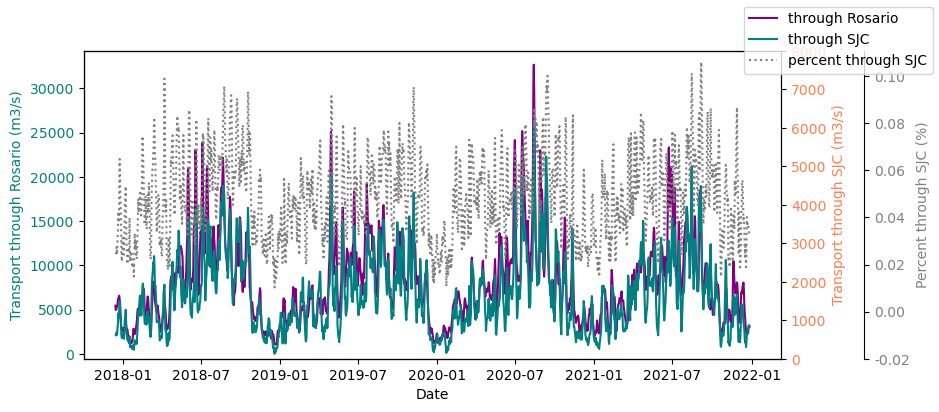

In [46]:
fig,ax = plt.subplots(figsize=(9,4))

ax.plot(rostosouth,color='purple',label='through Rosario')
ax.set_yticks(np.arange(0,35000,5000),color='teal')
ax.set_yticklabels(np.arange(0,35000,5000),color='teal')
ax.set_ylabel('Transport through Rosario (m3/s)',color='teal')
ax2 = ax.twinx()
ax2.plot(sjctosouth,color='teal',label='through SJC')
ax2.set_ylim([0,8000])
ax2.set_yticks(np.arange(0,8001,1000),color='coral')
ax2.set_yticklabels(np.arange(0,8001,1000),color='coral')
ax2.set_ylabel('Transport through SJC (m3/s)',color='coral')
ax3 = ax.twinx()
ax3.plot(prop_sjc,color='grey',ls=':',label='percent through SJC')
ax3.spines['right'].set_position(('outward', 60))
ax3.set_yticks(np.arange(-0.02,0.12,0.02))
ax3.set_yticklabels(np.arange(-0.02,0.12,0.02),color='grey');
ax3.yaxis.set_major_formatter(StrMethodFormatter(f'{{x:.{2}f}}'))
ax3.set_ylabel('Percent through SJC (%)',color='grey')
ax.set_xlabel('Date')
fig.legend()

In [47]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/southflow_sjc.png',bbox_inches='tight')

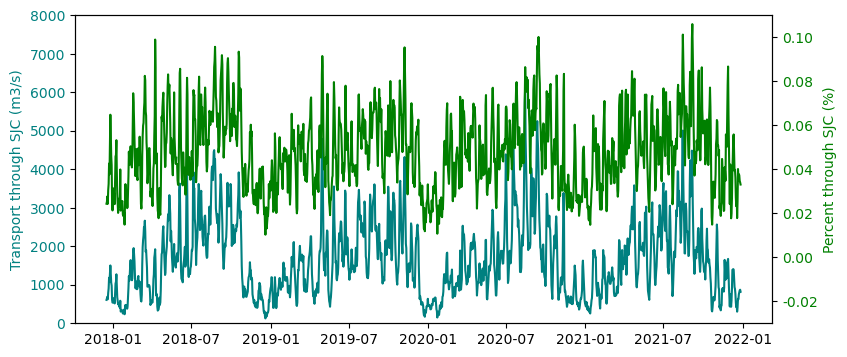

In [48]:
fig,ax = plt.subplots(figsize=(9,4))

ax.plot(sjctosouth,color='teal')
ax.set_ylim([0,8000])
ax.set_yticks(np.arange(0,8001,1000),color='teal')
ax.set_yticklabels(np.arange(0,8001,1000),color='teal')
ax.set_ylabel('Transport through SJC (m3/s)',color='teal')
ax3 = ax.twinx()
ax3.plot(prop_sjc,color='green')
ax3.set_ylim([-0.03,0.11])
ax3.set_yticks(np.arange(-0.02,0.12,0.02),color='green')
ax3.set_yticklabels(np.arange(-0.02,0.12,0.02),color='green')
ax3.set_ylabel('Percent through SJC (%)',color='green')
ax3.yaxis.set_major_formatter(StrMethodFormatter(f'{{x:.{2}f}}'))

Flow through both rosario and haro increases in summer, proportion going through rosario also increases

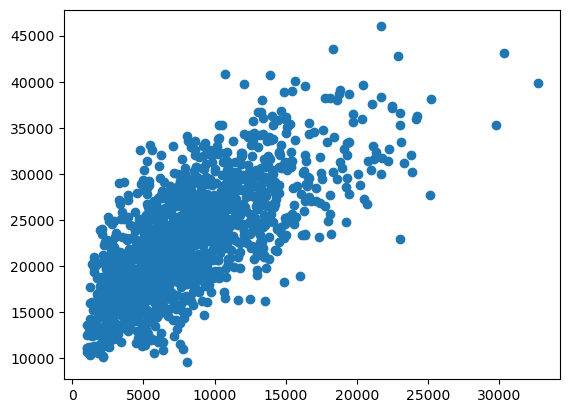

In [49]:
plt.scatter(rostosouth.dropna(),harotosouth.dropna()[2:])

#### Correlations with transport south through Haro

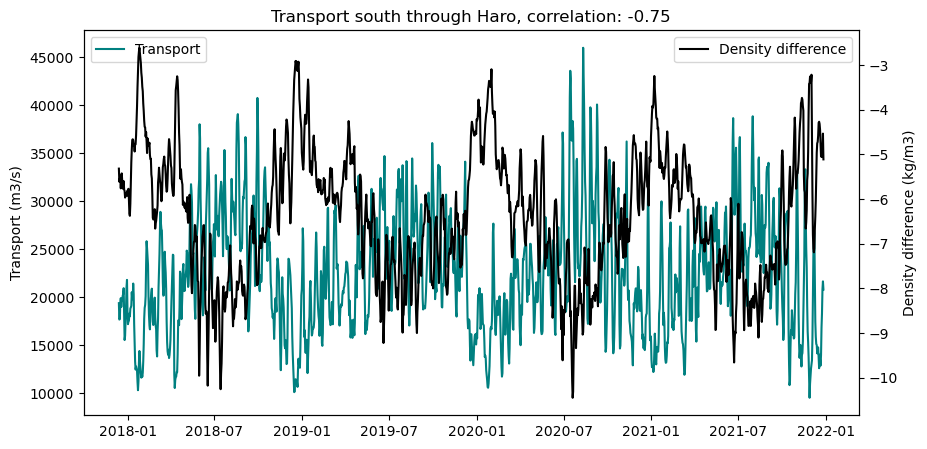

In [50]:
date_harosh = list(harotosouth.dropna().index)

mask = np.isin(datelist_dens,date_harosh)
densdiff_haro = dens_diff_vspr[mask]
date_dens_haro_sh = np.array(datelist_dens)[mask]

corr_harotosouth,p = stats.spearmanr(densdiff_haro,harotosouth.dropna())

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(harotosouth.dropna(),color='teal',label='Transport')
ax2=ax.twinx()
ax2.plot(date_dens_haro_sh,densdiff_haro,color='k',label='Density difference')
ax.set_title(f'Transport south through Haro, correlation: {np.round(corr_harotosouth,2)}')
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Density difference (kg/m3)')
ax.legend(loc=2)
ax2.legend()

Find density difference N/S through Haro to increase this correlation?

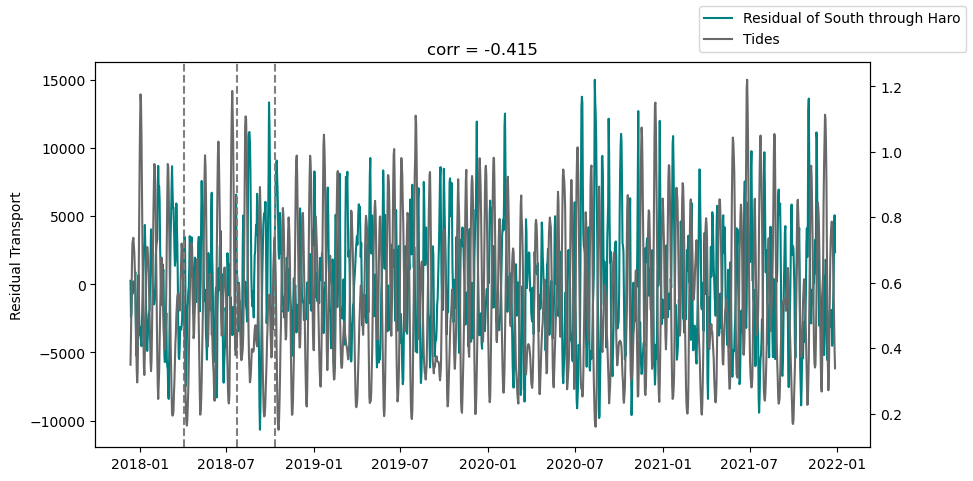

In [51]:
slope,intercept = np.polyfit(densdiff_haro,harotosouth.dropna(),1)
ddline_haro = slope*densdiff_haro+intercept
res_haro = harotosouth.dropna() - ddline_haro

mask = np.isin(datelist_tides,date_harosh)
date_tides_haro_sh = np.array(datelist_tides)[mask]
tides_haro_sh = tides.vozocrtx[mask]

corr_res_haro,p = stats.spearmanr(tides_haro_sh,res_haro)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res_haro,color='teal',label='Residual of South through Haro')
ax2 = ax.twinx()
ax2.plot(date_tides_haro_sh,tides_haro_sh,color='dimgrey',label='Tides')
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr_res_haro,3)}')
# ax.plot(rostosouth.dropna(),label='Transport south through Rosario')
# ax.plot(res,label='Residual south through Rosario',color='darkblue')
ax.axvline(date_tides_sh[110],ls='--',color='grey')
ax.axvline(date_tides_sh[220],ls='--',color='grey')
ax.axvline(date_tides_sh[300],ls='--',color='grey')
# ax3 = ax.twinx()
# ax3.plot(date_winds_sh,winds_sh,color='darkgrey',label='Winds')
# ax3.spines['right'].set_position(('outward', 80))
fig.legend()

Text(0, 0.5, 'Wind velocity')

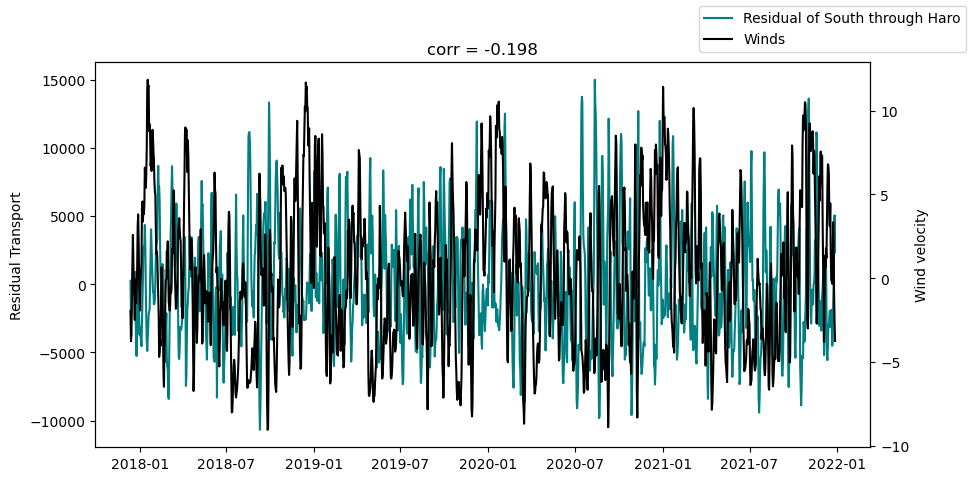

In [52]:
mask = np.isin(datelist_winds,date_harosh)
date_winds_sh = np.array(datelist_winds)[mask]
winds_haro = y_mean4[mask]

corr,p = stats.spearmanr(winds_haro,res_haro)
corr

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res_haro,color='teal',label='Residual of South through Haro')
ax2 = ax.twinx()
ax2.plot(date_winds_sh,winds_haro,color='k',label='Winds')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr,3)}')
ax2.set_ylabel('Wind velocity')

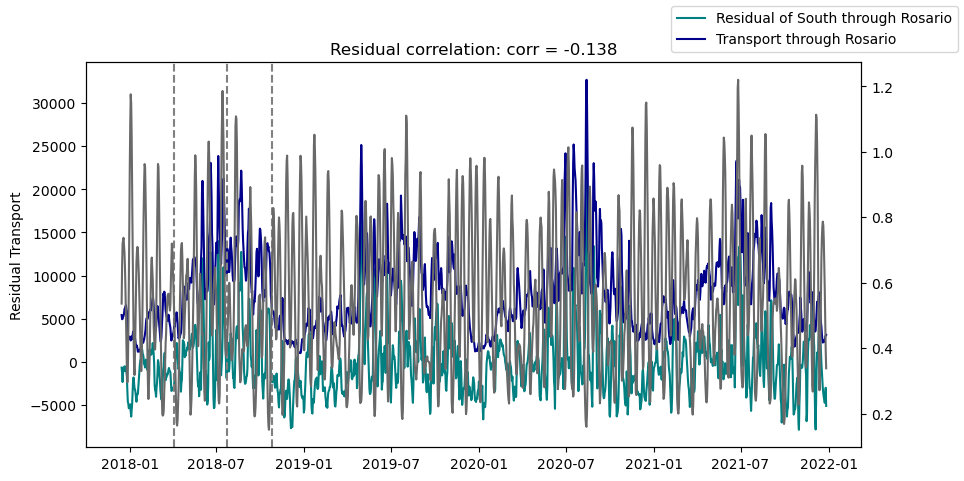

In [ ]:
corr,p = stats.spearmanr(winds_haro,res_haro)
corr

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res,color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_tides_sh,tides_sh,color='dimgrey')
ax.plot(rostosouth.dropna(),color='darkblue',label='Transport through Rosario')
# ax.plot(harotosouth.dropna(),color='sienna',label='Transport through Haro')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'Residual correlation: corr = {np.round(corr_res_ros,3)}')
ax.axvline(date_tides_sh[110],ls='--',color='grey')
ax.axvline(date_tides_sh[220],ls='--',color='grey')
ax.axvline(date_tides_sh[315],ls='--',color='grey')

In [ ]:
#Compare correlation with density difference b/w years

corr,p = stats.spearmanr(densdiff_haro[110:240],harotosouth.dropna()[110:240])
print(corr)
corr,p = stats.spearmanr(densdiff_haro[470:600],harotosouth.dropna()[470:600])
print(corr)
corr,p = stats.spearmanr(densdiff_haro[860:970],harotosouth.dropna()[860:970])
print(corr)
corr,p = stats.spearmanr(densdiff_haro[1210:1330],harotosouth.dropna()[1210:1330])
print(corr)

-0.8144669461552116
-0.6765379835857378
-0.6640082952009557
-0.4489825682339051


The positive correlation doesn't happen in 2019 or 2020

In [ ]:
corr,p = stats.spearmanr(tides_haro_sh[110:240],res_haro[110:240])
print(corr)
corr,p = stats.spearmanr(tides_haro_sh[470:600],res_haro[470:600])
print(corr)
corr,p = stats.spearmanr(tides_haro_sh[860:970],res_haro[860:970])
print(corr)

corr,p = stats.spearmanr(tides_haro_sh[:379],res_haro[:379])
print(corr)
corr,p = stats.spearmanr(tides_haro_sh[379:750],res_haro[379:750])
print(corr)
corr,p = stats.spearmanr(tides_haro_sh[750:],res_haro[750:])
print(corr)

-0.04344999931721039
-0.5964658810034276
-0.6234790253138877
-0.3114876020305821
-0.46416527822492526
-0.44491729853240414


Rosario

In [60]:
date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_yrs = []
dates = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_yrs.append(date)
    date += dt.timedelta(days=1)

-0.1222821559764574
-0.28022504745387755
-0.21142393435971418
-0.3125008681158413


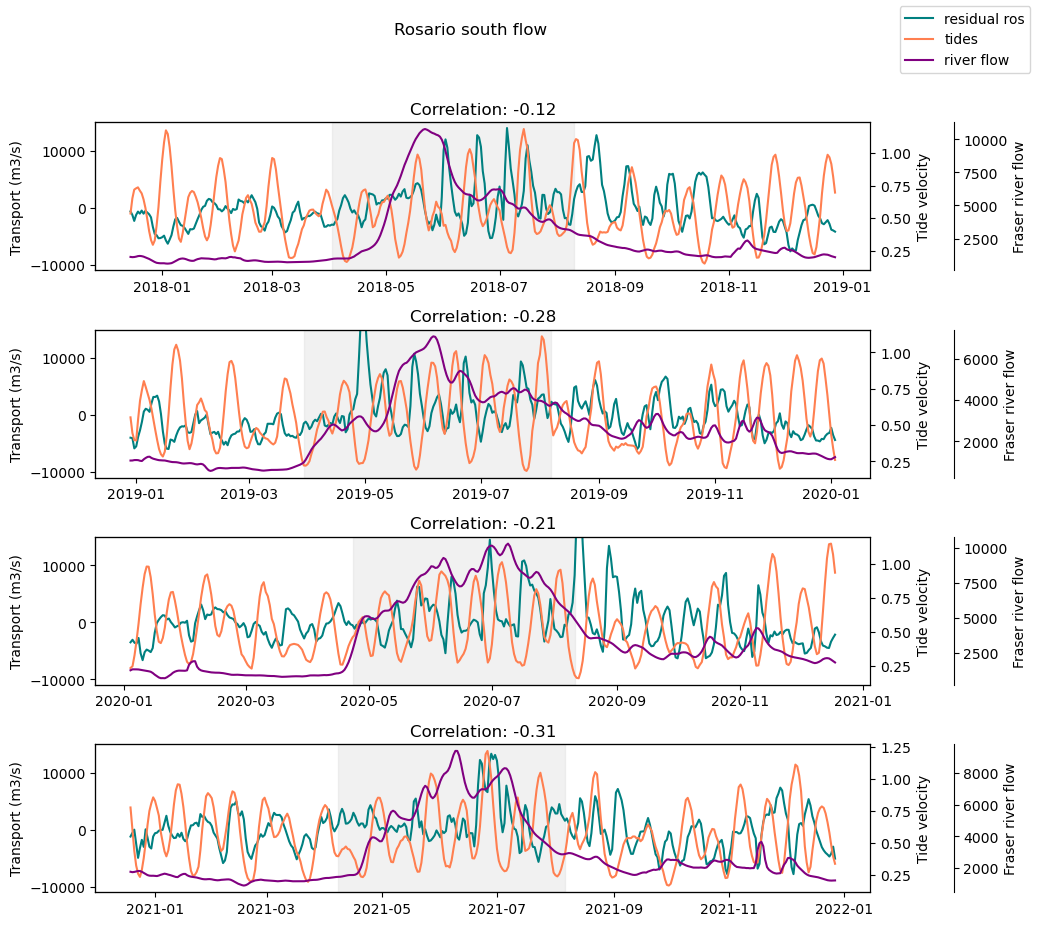

In [61]:
mask = np.isin(datelist_yrs,date_harosh)
FR_haro = FR_4mean[mask]

corr_2018,p = stats.spearmanr(tides_sh[110:240],res[110:240])
print(corr_2018)
corr_2019,p = stats.spearmanr(tides_sh[470:600],res[470:600])
print(corr_2019)
corr_2020,p = stats.spearmanr(tides_sh[860:970],res[860:970])
print(corr_2020)
corr_2021,p = stats.spearmanr(tides_sh[1210:1330],res[1210:1330])
print(corr_2021)


fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,10))

ax.plot(res[0:379],color='teal',label='residual ros')
ax2 = ax.twinx()
ax2.plot(date_rossh[0:379],tides_sh[0:379],color='coral',label='tides')
ax3 = ax.twinx()
# ax3.plot(haro_btrop,color='coral')
ax3.plot(date_rossh[0:379],FR_haro[0:379],color='purple',label='river flow')
ax.set_title(f'Correlation: {np.round(corr_2018,2)}')
ax.set_ylim([-11000,15000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_harosh[110],x2=date_harosh[240],color='lightgrey', alpha=0.3)
ax3.spines['right'].set_position(('outward', 60))
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
ax3.set_ylabel('Fraser river flow')
fig.legend()
fig.suptitle('Rosario south flow')

ax4.plot(res[379:750],color='teal')
ax42 = ax4.twinx()
ax42.plot(date_rossh[379:750],tides_sh[379:750],color='coral')
ax43 = ax4.twinx()
# ax3.plot(haro_btrop,color='coral')
ax43.plot(date_rossh[379:750],FR_haro[379:750],color='purple')
ax4.set_title(f'Correlation: {np.round(corr_2019,2)}')
ax4.set_ylim([-11000,15000])
ax4.fill_betweenx(y=np.linspace(ax4.get_ylim()[0], ax4.get_ylim()[1], 100),x1=date_rossh[470],x2=date_rossh[600],color='lightgrey', alpha=0.3)
ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')
ax43.set_ylabel('Fraser river flow')

ax5.plot(res[750:1100],color='teal')
ax52 = ax5.twinx()
ax52.plot(date_rossh[750:1100],tides_sh[750:1100],color='coral')
ax53 = ax5.twinx()
# ax3.plot(haro_btrop,color='coral')
ax53.plot(date_rossh[750:1100],FR_haro[750:1100],color='purple')
ax5.set_title(f'Correlation: {np.round(corr_2020,2)}')
ax5.set_ylim([-11000,15000])
ax5.fill_betweenx(y=np.linspace(ax4.get_ylim()[0], ax4.get_ylim()[1], 100),x1=date_rossh[860],x2=date_rossh[970],color='lightgrey', alpha=0.3)
ax53.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')
ax53.set_ylabel('Fraser river flow')

ax6.plot(res[1100:],color='teal')
ax62 = ax6.twinx()
ax62.plot(date_rossh[1100:],tides_sh[1100:],color='coral')
ax63 = ax6.twinx()
# ax3.plot(haro_btrop,color='coral')
ax63.plot(date_rossh[1100:],FR_haro[1100:-2],color='purple')
ax6.set_title(f'Correlation: {np.round(corr_2021,2)}')
ax6.set_ylim([-11000,15000])
ax6.fill_betweenx(y=np.linspace(ax4.get_ylim()[0], ax4.get_ylim()[1], 100),x1=date_rossh[1210],x2=date_rossh[1330],color='lightgrey', alpha=0.3)
ax63.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')
ax63.set_ylabel('Fraser river flow')

plt.subplots_adjust(hspace=0.4)

### Look at correlations of South Haro with winds, tides, FR flow

First need to calculate tides, residual separately for each year ..

In [62]:
#South flow through Haro
harotosouth_2018 = harotosouth.dropna()[0:384]
harotosouth_2019 = harotosouth.dropna()[384:749]
harotosouth_2020 = harotosouth.dropna()[749:1110]
harotosouth_2021 = harotosouth.dropna()[1110:]

#Tides
tides_haro_2018 = tides_haro_sh[0:384]
tides_haro_2019 = tides_haro_sh[384:749]
tides_haro_2020 = tides_haro_sh[749:1110]
tides_haro_2021 = tides_haro_sh[1110:]

#Winds
winds_haro_2018 = winds_haro[0:384]
winds_haro_2019 = winds_haro[384:749]
winds_haro_2020 = winds_haro[749:1110]
winds_haro_2021 = winds_haro[1110:]

#Density difference
densdiff_haro_2018 = densdiff_haro[0:384]
densdiff_haro_2019 = densdiff_haro[384:749]
densdiff_haro_2020 = densdiff_haro[749:1110]
densdiff_haro_2021 = densdiff_haro[1110:]

#residual 2018
slope,intercept = np.polyfit(densdiff_haro_2018,harotosouth_2018,1)
ddline_haro_2018 = slope*densdiff_haro_2018+intercept
res_haro_2018 = harotosouth_2018 - ddline_haro_2018

#residual 2019
slope,intercept = np.polyfit(densdiff_haro_2019,harotosouth_2019,1)
ddline_haro_2019 = slope*densdiff_haro_2019+intercept
res_haro_2019 = harotosouth_2019 - ddline_haro_2019

#residual 2020
slope,intercept = np.polyfit(densdiff_haro_2020,harotosouth_2020,1)
ddline_haro_2020 = slope*densdiff_haro_2020+intercept
res_haro_2020 = harotosouth_2020 - ddline_haro_2020

#residual 2021
slope,intercept = np.polyfit(densdiff_haro_2021,harotosouth_2021,1)
ddline_haro_2021 = slope*densdiff_haro_2021+intercept
res_haro_2021 = harotosouth_2021 - ddline_haro_2021

#date
date_haro_2018 = date_harosh[0:384]
date_haro_2019 = date_harosh[384:749]
date_haro_2020 = date_harosh[749:1110]
date_haro_2021 = date_harosh[1110:]

Look at residual with tides

-0.05179095713446858
-0.5687651702346331
-0.635713192364042
-0.566403533707988


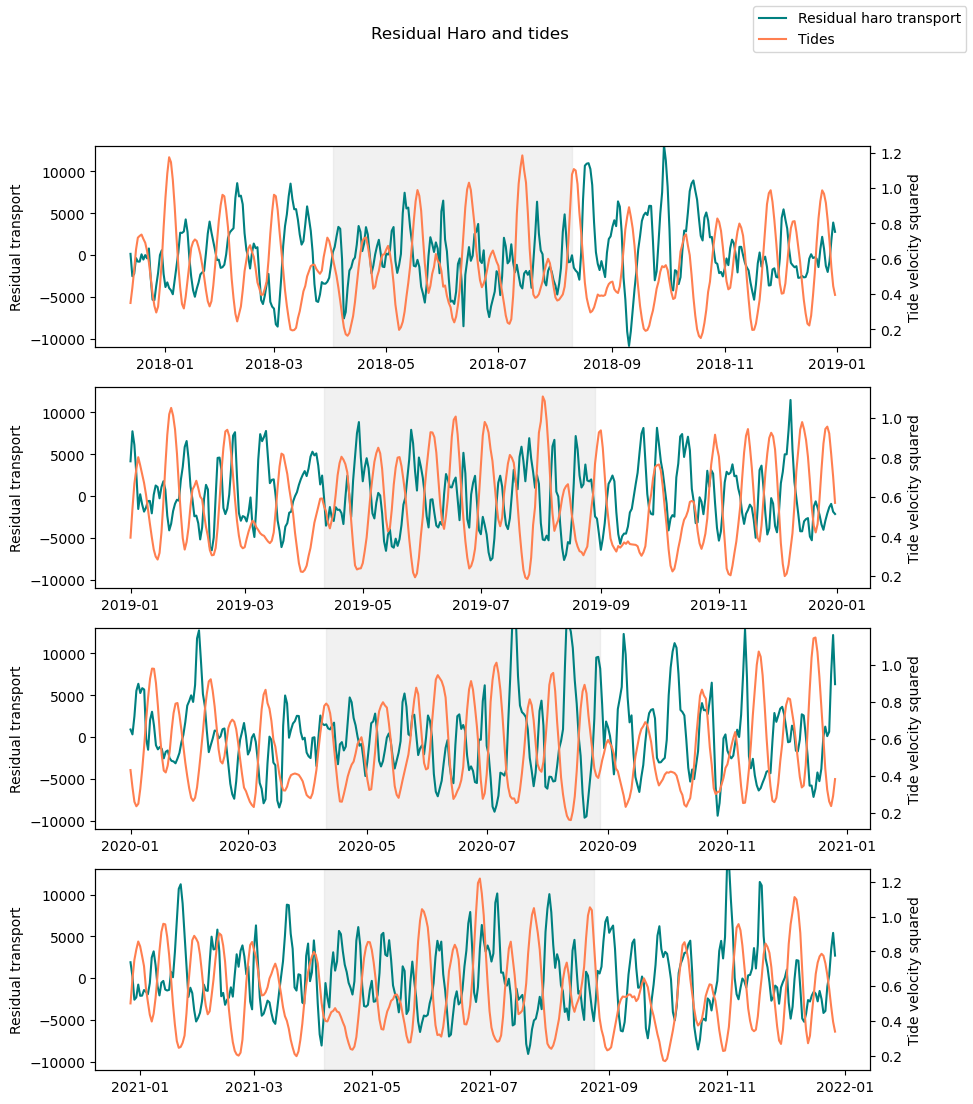

In [63]:
corr_2018,p = stats.spearmanr(tides_haro_2018[110:240],res_haro_2018[110:240])
print(corr_2018)
corr_2019,p = stats.spearmanr(tides_haro_2019[100:240],res_haro_2019[100:240])
print(corr_2019)
corr_2020,p = stats.spearmanr(tides_haro_2020[100:240],res_haro_2020[100:240])
print(corr_2020)
corr_2021,p = stats.spearmanr(tides_haro_2021[100:240],res_haro_2021[100:240])
print(corr_2021)

fig,[ax,ax2,ax3,ax4] = plt.subplots(4,1,figsize=(10,12))
ax.plot(res_haro_2018,color='teal',label='Residual haro transport')
ax12 = ax.twinx()
ax12.plot(date_haro_2018,tides_haro_2018,color='coral',label='Tides')
ax.set_ylim((-11000,13000))
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_haro_2018[110],x2=date_haro_2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Residual transport')
ax12.set_ylabel('Tide velocity squared')

ax2.plot(res_haro_2019,color='teal')
ax22 = ax2.twinx()
ax22.plot(date_haro_2019,tides_haro_2019,color='coral')
ax2.set_ylim((-11000,13000))
ax2.fill_betweenx(y=np.linspace(ax2.get_ylim()[0], ax2.get_ylim()[1], 100),x1=date_haro_2019[100],x2=date_haro_2019[240],color='lightgrey', alpha=0.3)
ax2.set_ylabel('Residual transport')
ax22.set_ylabel('Tide velocity squared')

ax3.plot(res_haro_2020,color='teal')
ax32 = ax3.twinx()
ax32.plot(date_haro_2020,tides_haro_2020,color='coral')
ax3.set_ylim((-11000,13000))
ax3.fill_betweenx(y=np.linspace(ax3.get_ylim()[0], ax3.get_ylim()[1], 100),x1=date_haro_2020[100],x2=date_haro_2020[240],color='lightgrey', alpha=0.3)
ax3.set_ylabel('Residual transport')
ax32.set_ylabel('Tide velocity squared')

ax4.plot(res_haro_2021,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_haro_2021,tides_haro_2021,color='coral')
ax4.set_ylim((-11000,13000))
ax4.fill_betweenx(y=np.linspace(ax4.get_ylim()[0], ax4.get_ylim()[1], 100),x1=date_haro_2021[100],x2=date_haro_2021[240],color='lightgrey', alpha=0.3)
ax4.set_ylabel('Residual transport')
ax42.set_ylabel('Tide velocity squared')

fig.suptitle('Residual Haro and tides')
fig.legend()